In [1]:
from torch_pgd import pgd_attack
from utils import get_pretrained_model

import torch as ch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

import os, random

In [2]:
def tensor2pic(ImA, pop_img=False, save=False, name="pil_image.png", verbose=False):
    ImA = ImA[0].numpy()
    ImA = ImA.transpose(1, 2, 0)
    img = Image.fromarray(np.uint8(ImA * 255), 'RGB')
    if save:
        if verbose:
            print("Storing image:", name)
        img.save(name)
    if pop_img:
        img.show()
    else:
        return img

In [3]:
paint_names = ['dog', 'cat2', 'frog', 'turtle', 'bird', 'primate2', 'fish', 'crab', 'insect']

In [4]:
# Storage details
save_images = True
title = "last_"
save_path = 'Results/paint/'
images = []

In [ ]:
# Parameters
eps = 100
steps = 100
step_size = 0.5
targeted_attack = True
norm = 'l2'
verbose = False

In [ ]:
# Models and datasets
dataset_path = 'datasets/'
model_name = 'RestrictedImageNet'

In [ ]:
_, model = get_pretrained_model(model_name)
model.eval()

l = []
    
for i in range(9):
    file = dataset_path + 'paint/' + paint_names[i] + '.png'
    imA = Image.open(file)
    imA = imA.convert("RGB")
    img_tA = transforms.ToTensor()(imA).view(1, 3, 224, 224)
    
    out_img = pgd_attack(img_tA, eps, model=model, steps=steps, step_size=step_size, 
                        targeted_attack=targeted_attack, target_class=i, 
                        norm=norm, verbose=verbose)
    
    l.append(out_img)
    
    tensor2pic(out_img, save=True, name=save_path+title+paint_names[i]+".png", verbose=verbose)    
    

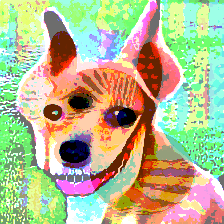

In [ ]:
tensor2pic(l[0])

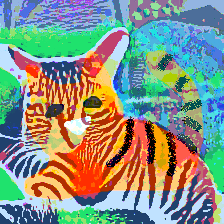

In [ ]:
tensor2pic(l[1])

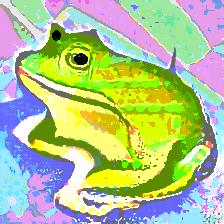

In [ ]:
tensor2pic(l[2])

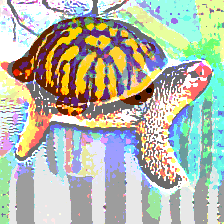

In [ ]:
tensor2pic(l[3])

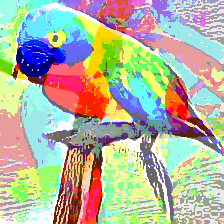

In [ ]:
tensor2pic(l[4])

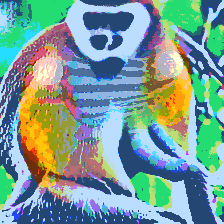

In [ ]:
tensor2pic(l[5])

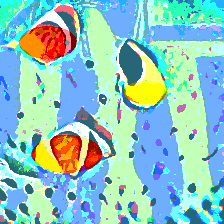

In [ ]:
tensor2pic(l[6])

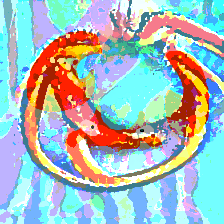

In [ ]:
tensor2pic(l[7])

In [ ]:
tensor2pic(l[8])